In [1]:
# Importing Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.ensemble import AdaBoostClassifier,AdaBoostRegressor,gradient_boosting
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.cluster import DBSCAN,k_means
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso,LassoCV,LinearRegression,Ridge,RidgeCV
from sklearn.feature_selection import chi2
from sklearn.model_selection import GridSearchCV,KFold,ParameterGrid,train_test_split
#from sklearn.neighbors import kd_tree,KDTree,KNeighborsClassifier
from sklearn.metrics import accuracy_score,auc,classification_report,confusion_matrix,euclidean_distances,euclidean_distances,f1_score
from sklearn.metrics import plot_roc_curve
from  sklearn.pipeline import Pipeline
from sklearn.svm import SVR,SVR
from sklearn.preprocessing import OneHotEncoder,power_transform,StandardScaler
from statsmodels.stats import anova,outliers_influence
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [3]:
# loading the dataset
df=pd.read_csv(r'D:\Datatrained\Practice Project Data Trained\HR Attrition Project\WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [4]:
# Checking dimension of dataset
df.shape

# (rows=1470, Column=35)

(1470, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
#dtypes: int64(26), object(9)

In [7]:
df.apply(lambda x: sum(x.isnull()))

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
# Lets look on number of unique value for each of categorical variable
df.apply(lambda x: len(x.unique()))

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [9]:
# Dropping the column whose unique value is 1
df=df.drop(columns=['StandardHours','Over18','EmployeeCount'],axis=1)

In [10]:
df.shape
#(rows=1470, colums=32)

(1470, 32)

In [16]:
#Statistical Summary
df.describe()

Age    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810   802.485714          9.192517     2.912925   
std       9.135373   403.509100          8.106864     1.024165   
min      18.000000   102.000000          1.000000     1.000000   
25%      30.000000   465.000000          2.000000     2.000000   
50%      36.000000   802.000000          7.000000     3.000000   
75%      43.000000  1157.000000         14.000000     4.000000   
max      60.000000  1499.000000         29.000000     5.000000   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  \
count  1470.000000      1470.000000    1470.000000   1470.000000   
mean      2.063946         2.728571    6502.931293  14313.103401   
std       1.106940         1.102846    4707.956783   7117.786044   
min       1.000000         1.000000    1009.000000   2094.000000   
25%       1.000000         2.000000    2911.000000   8047.000000   
50%       2.000000         3.000000    4919.000000  14235.500000   
75%       3.000000         4.000000    8379.000000  20461.500000   
max       5.000000         4.000000   19999.000000  26999.000000   

       NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count         1470.000000        1470.000000        1470.000000   
mean             2.693197          15.209524           3.153741   
std              2.498009           3.659938           0.360824   
min              0.000000          11.000000           3.000000   
25%              1.000000          12.000000           3.000000   
50%              2.000000          14.000000           3.000000   
75%              4.000000          18.000000           3.000000   
max              9.000000          25.000000           4.000000   

       RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
count               1470.000000       1470.000000        1470.000000   
mean                   2.712245          0.793878          11.279592   
std                    1.081209          0.852077           7.780782   
min                    1.000000          0.000000           0.000000   
25%                    2.000000          0.000000           6.000000   
50%                    3.000000          1.000000          10.000000   
75%                    4.000000          1.000000          15.000000   
max                    4.000000          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            1470.000000      1470.000000     1470.000000   
mean                2.799320         2.761224        7.008163   
std                 1.289271         0.706476        6.126525   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000        9.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         1470.000000              1470.000000           1470.000000  
mean             4.229252                 2.187755              4.123129  
std              3.623137      

In [17]:
# No null value
# Std is high for DailyRate,high gap between min & median
# std is high for DistanceFromHome,EmployeeNumber,
#Std is high for EmployeeNumber
# Std is high for MonthlyIncome
# Std is high for MonthlyRate

In [18]:
# Checking null value in Dataset even in Categorical variable

df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [19]:
# Multivariate Analysis
# checking correlation

corr_mat=df.corr() 
corr_mat

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EmployeeNumber           -0.010145  -0.050990          0.032916   0.042070   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
PerformanceRating         0.001904   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
StockOptionLevel          0.037510   0.042143          0.044872   0.018422   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.311309  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.212901   0.009932          0.018845   0.060236   
YearsSinceLastPromotion   0.216513  -0.033229          0.010029   0.054254   
YearsWithCurrManager      0.202089  -0.026363          0.014406   0.069065   

                          EmployeeNumber  EnvironmentSatisfaction  HourlyRate  \
Age                            -0.010145                 0.010146    0.024287   
DailyRate                      -0.050990                 0.018355    0.023381   
DistanceFromHome                0.032916                -0.016075    0.031131   
Education                       0.042070                -0.027128    0.016775   
EmployeeNumber                  1.000000                 0.017621    0.035179   
EnvironmentSatisfaction         0.017621                 1.000000   -0.049857   
HourlyRate                      0.035179                -0.049857    1.000000   
JobInvolvement                 -0.006888                -0.008278    0.042861   
JobLevel                       -0.018519                 0.001212   -0.027853   
JobSatisfaction                -0.046247                -0.006784   -0.071335   
MonthlyIncome                  -0.014829                -0.006259   -0.015794   
MonthlyRate                     0.012648                 0.037600   -0.015297   
NumCompaniesWorked             -0.001251                 0.012594    0.022157   
PercentSalaryHike              -0.012944                -0.031701   -0.009062   
PerformanceRating              -0.020359                -0.029548   -0.002172   
RelationshipSatisfaction       -0.069861                 0.007665    0.001330   
StockOptionLevel                0.062227                 0.003432    0.050263   
TotalWorkingYears              -0.014365                -0.002693   -0.002334   
TrainingTimesLastYear           0.023603                -0.019359   -0.008548   
WorkLifeBalance                 0.010309                 0.027627   -0.004607   
YearsAtCompany                 -0.011240                 0.001458   -0.019582   
YearsInCurrentRole             -0.008416                 0.018007   -0.024106   
YearsSinceLastPromotion        -0.009019                 0.016194   -0.026716   
YearsWithCurrManager           -0.009197                -0.004999   -0.020123   

                          JobInvolvement  JobLevel  Jo

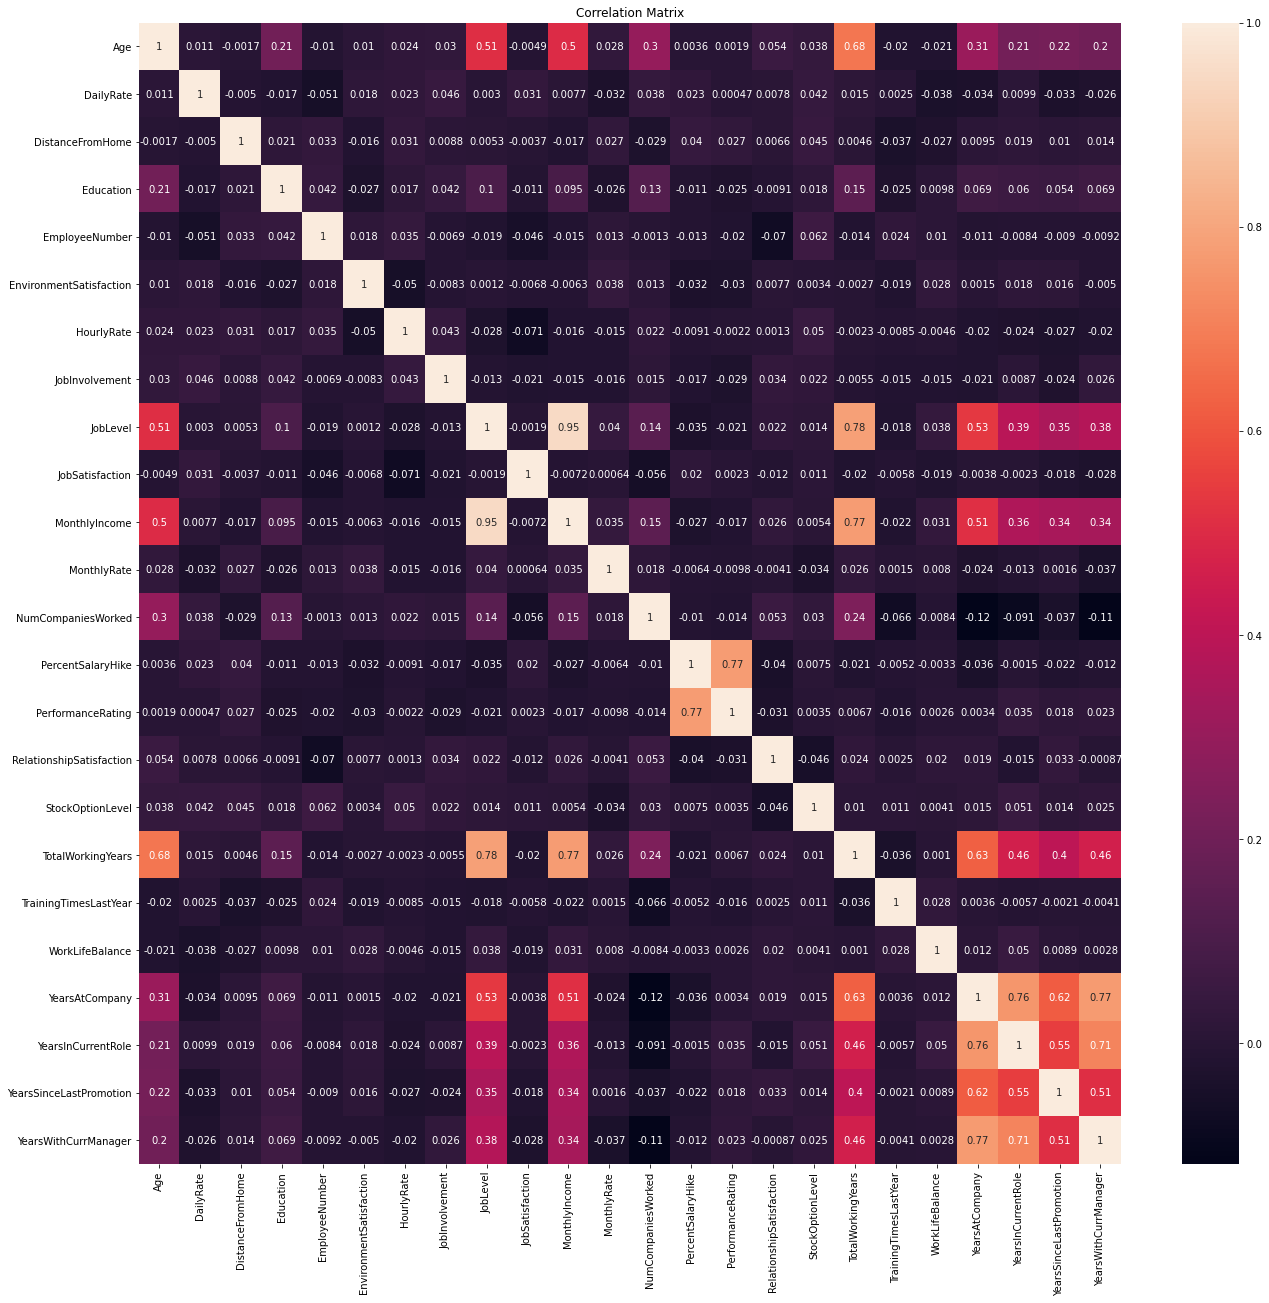

In [20]:
plt.figure(figsize= [22,21])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [21]:
#No storng co relation observed between two features,.77 between PerformanceRating and PercentSalaryHike
#.78 between TotalWorkingYears and JobLevel
#.78 between YearsAtCompany and YearsWithCurrManager

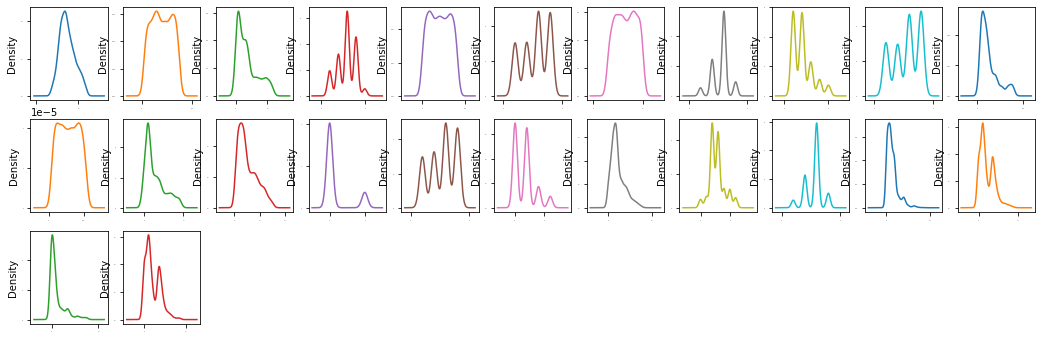

In [22]:
# Multi variate Analysis for integers and float features 
df.plot(kind='density',subplots=True,layout=(6,11),sharex=False,legend=False,fontsize=1,figsize=(18,12))
plt.show()

In [23]:
# Right and Left Skeweness observed 

In [24]:
df_cnt=df[['Age','DailyRate','DistanceFromHome','EmployeeNumber','HourlyRate','MonthlyIncome','MonthlyRate']]

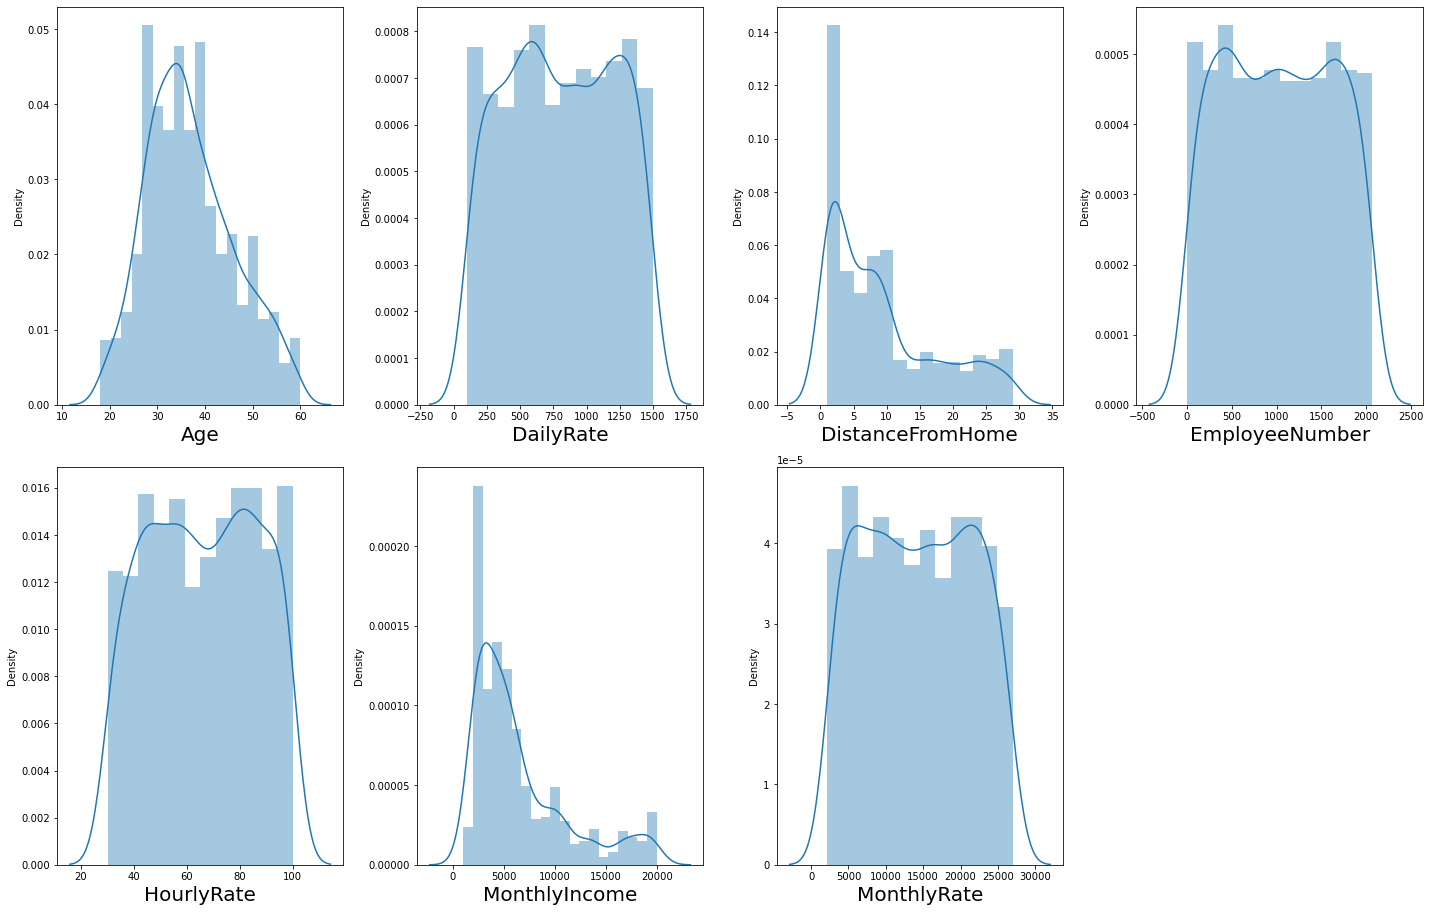

In [25]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df_cnt:
    if plotnumber<=14:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df_cnt[column])
        plt.xlabel(column,fontsize=20)
       
    
    plotnumber+=1
plt.tight_layout()  

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
lab_enc=LabelEncoder()

In [28]:
df2=lab_enc.fit_transform(df['Attrition'])
pd.Series(df2)

0       1
1       0
2       1
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      1
15      0
16      0
17      0
18      0
19      0
20      0
21      1
22      0
23      0
24      1
25      0
26      1
27      0
28      0
29      0
30      0
31      0
32      0
33      1
34      1
35      0
36      1
37      0
38      0
39      0
40      0
41      0
42      1
43      0
44      0
45      1
46      0
47      0
48      0
49      0
50      1
51      1
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      1
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      0
79      0
80      0
81      0
82      0
83      0
84      0
85      0
86      0
87      0
88      0
89      1
90      0
91      0
92      0
93      0
94      0
95      0
96      0
97      0
98      0
99      0


In [29]:
df['Attrition']=df2
df

Age  Attrition     BusinessTravel  DailyRate              Department  \
0      41          1      Travel_Rarely       1102                   Sales   
1      49          0  Travel_Frequently        279  Research & Development   
2      37          1      Travel_Rarely       1373  Research & Development   
3      33          0  Travel_Frequently       1392  Research & Development   
4      27          0      Travel_Rarely        591  Research & Development   
5      32          0  Travel_Frequently       1005  Research & Development   
6      59          0      Travel_Rarely       1324  Research & Development   
7      30          0      Travel_Rarely       1358  Research & Development   
8      38          0  Travel_Frequently        216  Research & Development   
9      36          0      Travel_Rarely       1299  Research & Development   
10     35          0      Travel_Rarely        809  Research & Development   
11     29          0      Travel_Rarely        153  Research & Development   
12     31          0      Travel_Rarely        670  Research & Development   
13     34          0      Travel_Rarely       1346  Research & Development   
14     28          1      Travel_Rarely        103  Research & Development   
15     29          0      Travel_Rarely       1389  Research & Development   
16     32          0      Travel_Rarely        334  Research & Development   
17     22          0         Non-Travel       1123  Research & Development   
18     53          0      Travel_Rarely       1219                   Sales   
19     38          0      Travel_Rarely        371  Research & Development   
20     24          0         Non-Travel        673  Research & Development   
21     36          1      Travel_Rarely       1218                   Sales   
22     34          0      Travel_Rarely        419  Research & Development   
23     21          0      Travel_Rarely        391  Research & Development   
24     34          1      Travel_Rarely        699  Research & Development   
25     53          0      Travel_Rarely       1282  Research & Development   
26     32          1  Travel_Frequently       1125  Research & Development   
27     42          0      Travel_Rarely        691                   Sales   
28     44          0      Travel_Rarely        477  Research & Development   
29     46          0      Travel_Rarely        705                   Sales   
30     33          0      Travel_Rarely        924  Research & Development   
31     44          0      Travel_Rarely       1459  Research & Development   
32     30          0      Travel_Rarely        125  Research & Development   
33     39          1      Travel_Rarely        895                   Sales   
34     24          1      Travel_Rarely        813  Research & Development   
35     43          0      Travel_Rarely       1273  Research & Development   
36     50          1      Travel_Rarely        869                   Sales   
37     35          0      Travel_Rarely        890                   Sales   
38     36          0      Travel_Rarely        852  Research & Development   
39     33          0  Travel_Frequently       1141                   Sales   
40     35          0      Travel_Rarely        464  Research & Development   
41     27          0      Travel_Rarely       1240  Research & Development   
42     26          1      Travel_Rarely       1357  Research & Development   
43     27          0  Travel_Frequently        994                   Sales   
44     30          0  Travel_Frequently        721  Research & Development   
45     41          1      Travel_Rarely       1360  Research & Development   
46     34          0         Non-Travel       1065                   Sales   
47     37          0      Travel_Rarely        408  Research & Development   
48     46          0  Travel_Frequently       1211                   Sales   
49     35          0      Travel_Rarely       1229  Research & Development   
50     48          1      Tr

In [30]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [31]:
#Filter Categorical Features for contineou data
numerics=['int8','int16','int32','int64','float16','float32','float64']
categorical_columns=[]
features=df.columns.values.tolist()
for col in features:
    if df[col].dtype in numerics:
        continue
    categorical_columns.append(col)

In [32]:
categorical_columns

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [33]:
# Encoding categorical columns using get_dummies
# silimar to onehotencoding but drop_first
# drop_first=True will reduce dimention.

In [34]:
df_dummies=pd.get_dummies(df[categorical_columns],drop_first=False)
df_dummies.head()

BusinessTravel_Non-Travel  BusinessTravel_Travel_Frequently  \
0                          0                                 0   
1                          0                                 1   
2                          0                                 0   
3                          0                                 1   
4                          0                                 0   

   BusinessTravel_Travel_Rarely  Department_Human Resources  \
0                             1                           0   
1                             0                           0   
2                             1                           0   
3                             0                           0   
4                             1                           0   

   Department_Research & Development  Department_Sales  \
0                                  0                 1   
1                                  1                 0   
2                                  1                 0   
3                                  1                 0   
4                                  1                 0   

   EducationField_Human Resources  EducationField_Life Sciences  \
0                               0                             1   
1                               0                             1   
2                               0                             0   
3                               0                             1   
4                               0                             0   

   EducationField_Marketing  EducationField_Medical  EducationField_Other  \
0                         0                       0                     0   
1                         0                       0                     0   
2                         0                       0                     1   
3                         0                       0                     0   
4                         0                       1                     0   

   EducationField_Technical Degree  Gender_Female  Gender_Male  \
0                                0              1            0   
1                                0              0            1   
2                                0              0            1   
3                                0              1            0   
4                                0              0            1   

   JobRole_Healthcare Representative  JobRole_Human Resources  \
0                                  0                        0   
1                                  0                        0   
2                                  0                        0   
3                                  0                        0   
4                                  0                        0   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                              0                0   
1                              0                0   
2                              1                0   
3                              0                0   
4                              1                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        1   
1                           1                        0   
2                           0                        0   
3                           1                        0   
4                           0                        0   

   JobRole_Sales Representative  MaritalStatus_Divorced  \
0                             0                       0   
1                             0                      

In [35]:
# dimention of df_dummies dataset
df_dummies.shape

(1470, 28)

In [36]:
#Joining the categotrical and countinueous features
x=df.join(df_dummies)

In [37]:
x.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_O

In [38]:
x1=x.drop(columns=['BusinessTravel','Department','EducationField', 'Gender','JobRole','MaritalStatus','OverTime'],axis=1)
x1.head(2)

Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeNumber  \
0   41          1       1102                 1          2               1   
1   49          0        279                 8          1               2   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                        2          94               3         2   
1                        3          61               2         2   

   JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  \
0                4           5993        19479                   8   
1                2           5130        24907                   1   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                 11                  3                         1   
1                 23                  4                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   

   YearsSinceLastPromotion  YearsWithCurrManager  BusinessTravel_Non-Travel  \
0                        0                     5                          0   
1                        1                     7                          0   

   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                                 0                             1   
1                                 1                             0   

   Department_Human Resources  Department_Research & Development  \
0                           0                                  0   
1                           0                                  1   

   Department_Sales  EducationField_Human Resources  \
0                 1                               0   
1                 0                               0   

   EducationField_Life Sciences  EducationField_Marketing  \
0                             1                         0   
1                             1                         0   

   EducationField_Medical  EducationField_Other  \
0                       0                     0   
1                       0                     0   

   EducationField_Technical Degree  Gender_Female  Gender_Male  \
0                                0              1            0   
1                                0              0            1   

   JobRole_Healthcare Representative  JobRole_Human Resources  \
0                                  0                        0   
1                                  0                        0   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                              0                0   
1                              0                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        1   
1                           1                        0   

   JobRole_Sales Representative  MaritalStatus_Divorced  \
0                             0                       0   
1                             0                       0   

   MaritalStatus_Married  MaritalStatus_Single  OverTime_No  OverTime_Yes  
0                      0                     1            0             1  
1                      1                     0            1             0

In [39]:
#Checking data type
x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 53 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int32
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EmployeeNumber                     1470 non-null   int64
 6   EnvironmentSatisfaction            1470 non-null   int64
 7   HourlyRate                         1470 non-null   int64
 8   JobInvolvement                     1470 non-null   int64
 9   JobLevel                           1470 non-null   int64
 10  JobSatisfaction                    1470 non-null   int64
 11  MonthlyIncome                      1470 non-null   int64
 12  MonthlyRate         

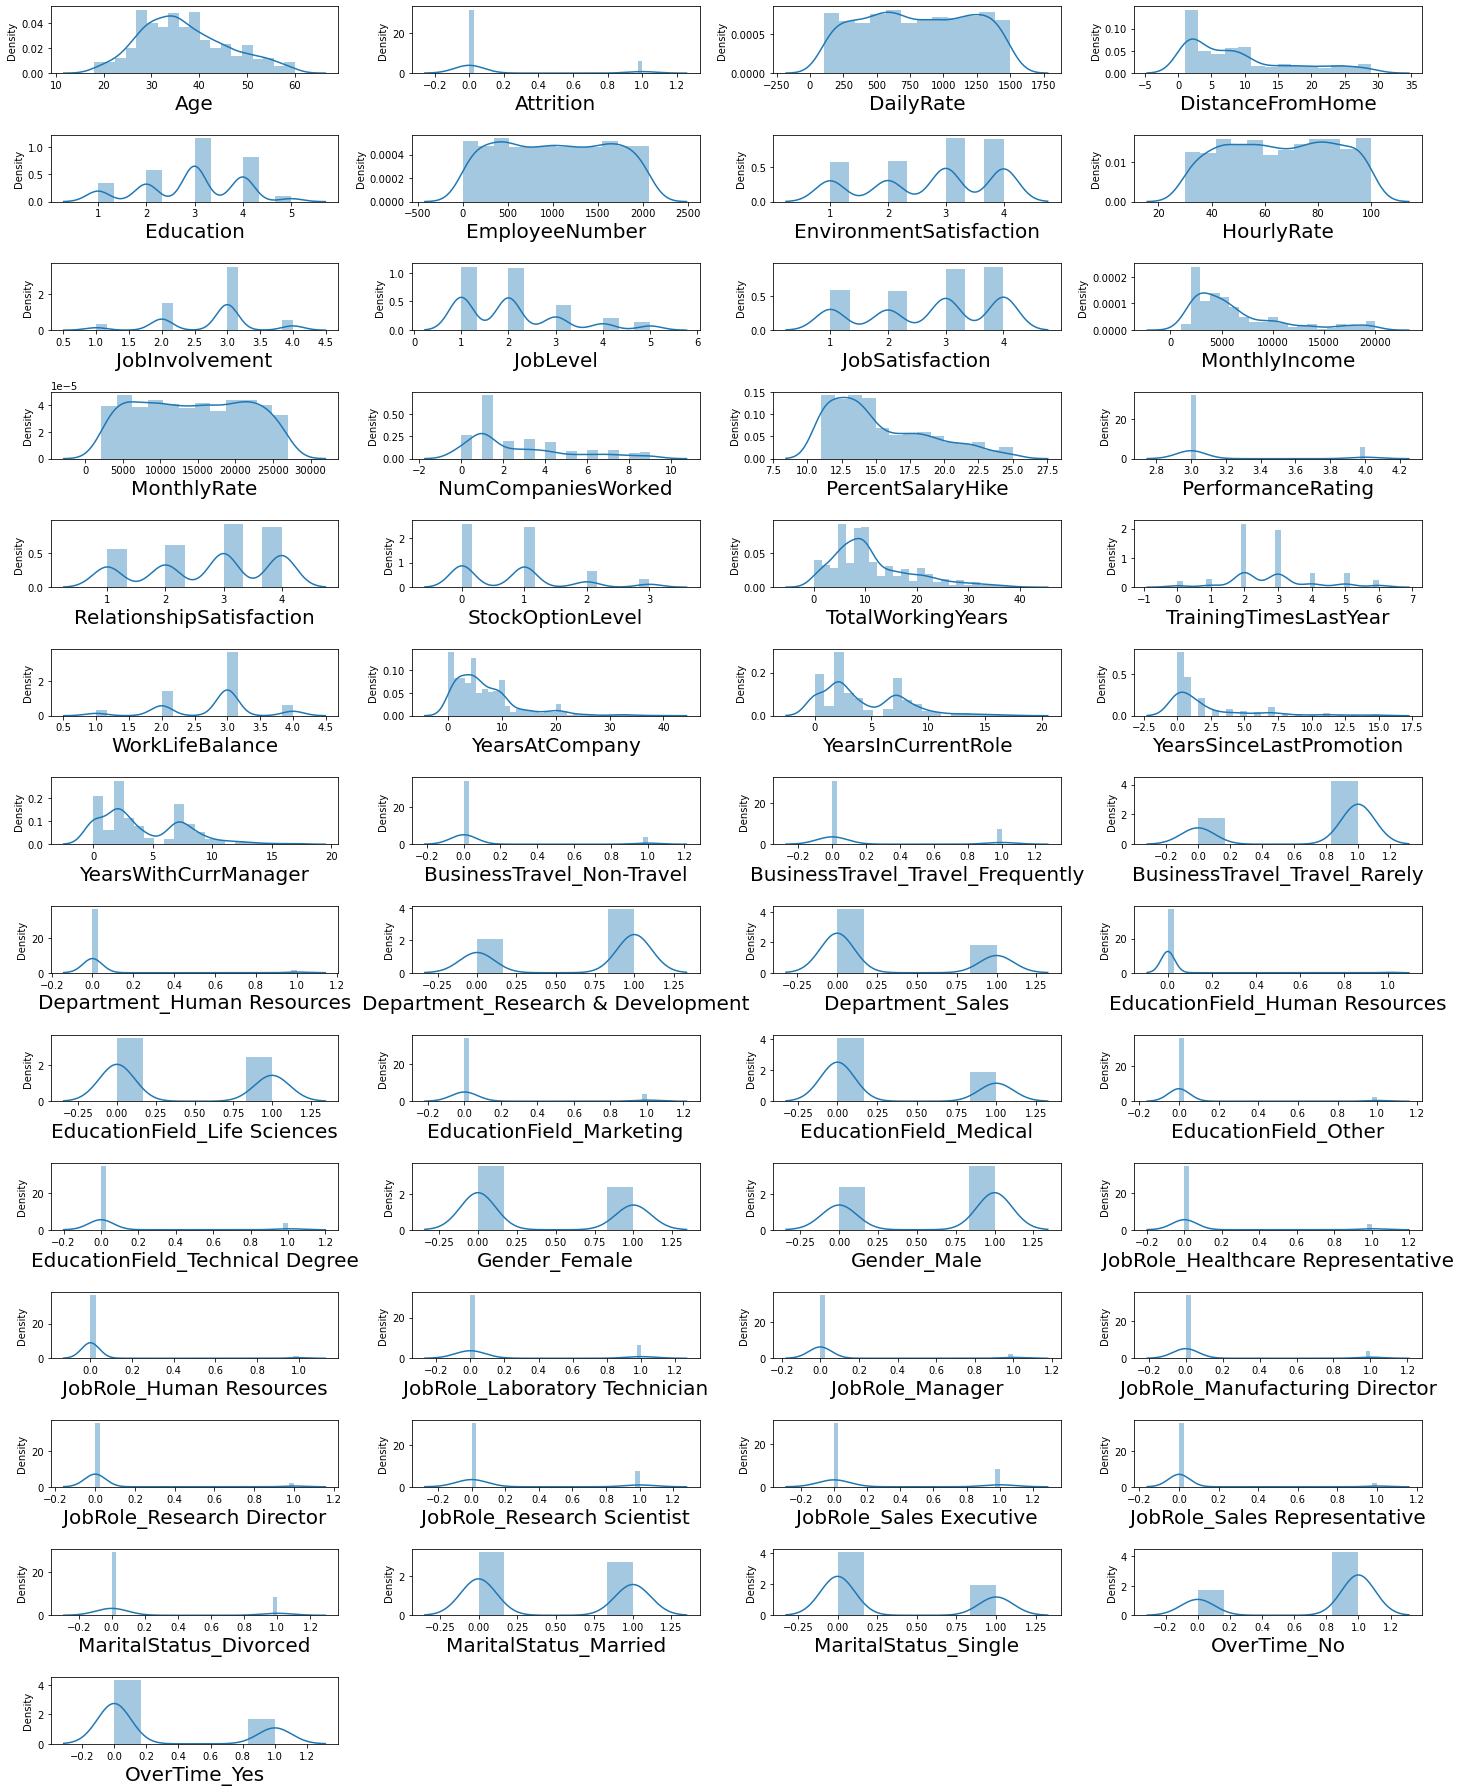

In [40]:
# checking the distribution of each feauture
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in x1:
    if plotnumber<=54:
        ax=plt.subplot(14,4,plotnumber)
        sns.distplot(x1[column])
        plt.xlabel(column,fontsize=20)
       
    
    plotnumber+=1
plt.tight_layout() 

In [41]:
#Looking for oultlier in categorical variable

In [42]:
#splitting the independent and target variable in x and y
x_s=x1.drop('Attrition',axis=1)
y_s=x1['Attrition']

In [43]:
x_s.shape

(1470, 52)

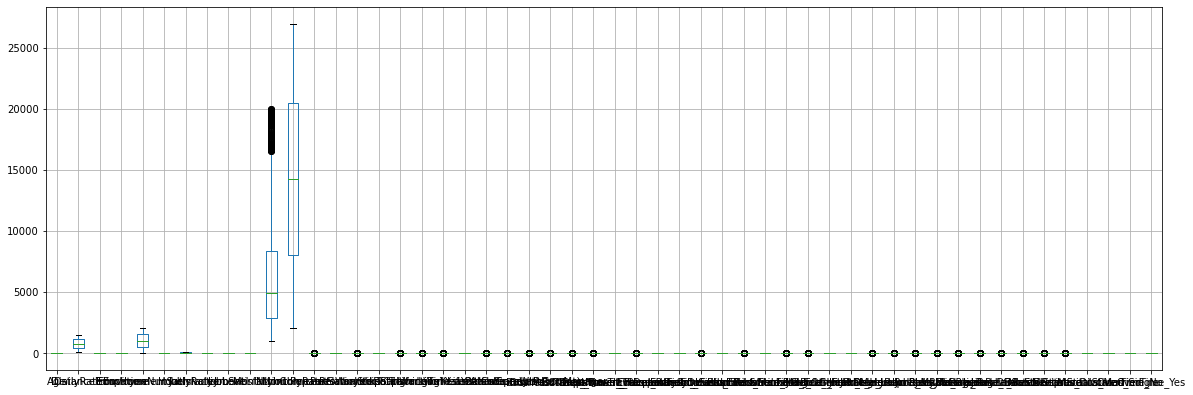

In [44]:
# There are 52 colums in dataset so its not possible to plot each and every columns seprately or plot all together also.So,we 
#will print in 3 steps

x_s.boxplot(figsize=[20,8],)
plt.subplots_adjust(bottom=.25)
plt.show()

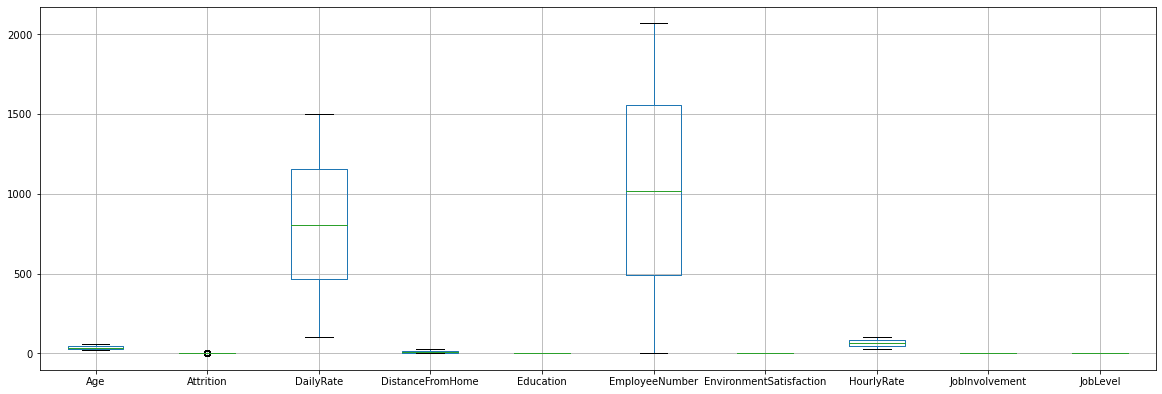

In [45]:
x1.iloc[:,0:10].boxplot(figsize=[20,8],)
plt.subplots_adjust(bottom=.25)
plt.show()

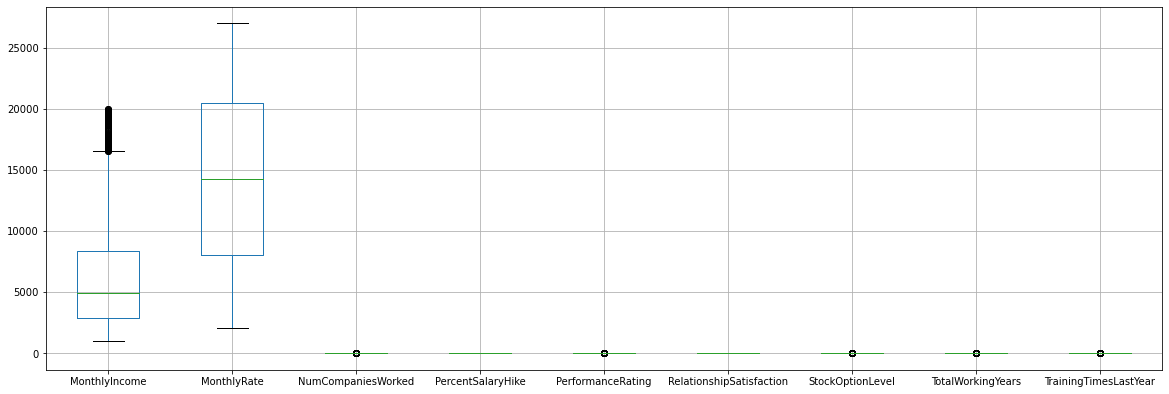

In [46]:
x1.iloc[:,11:20].boxplot(figsize=[20,8],)
plt.subplots_adjust(bottom=.25)
plt.show()

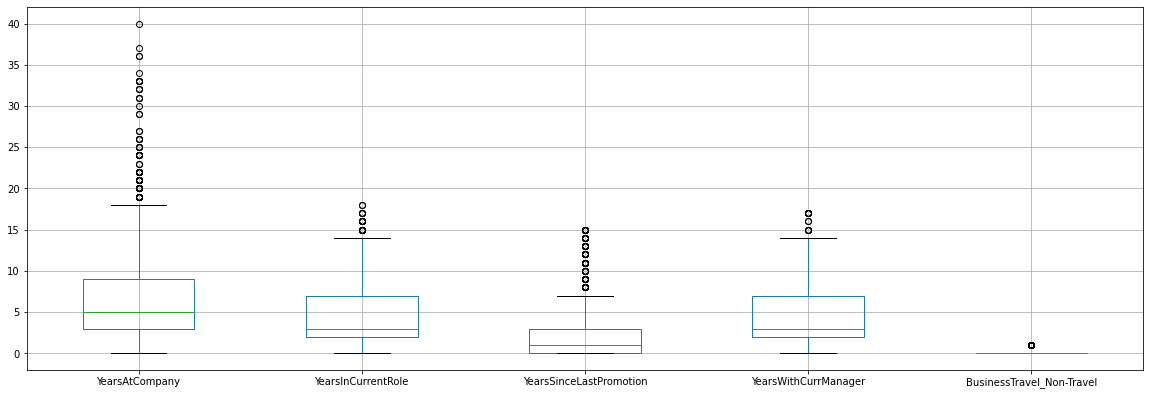

In [47]:
x1.iloc[:,21:26].boxplot(figsize=[20,8],)
plt.subplots_adjust(bottom=.25)
plt.show()

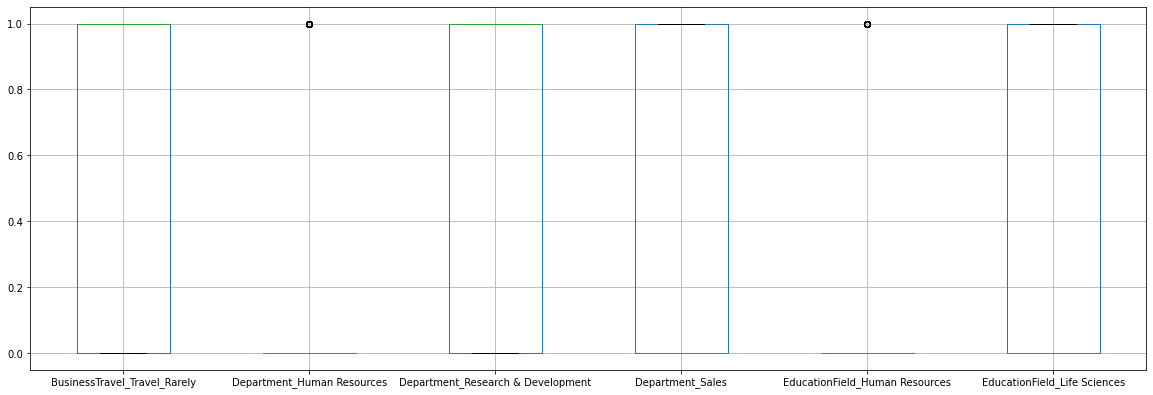

In [48]:
x1.iloc[:,27:33].boxplot(figsize=[20,8],)
plt.subplots_adjust(bottom=.25)
plt.show()

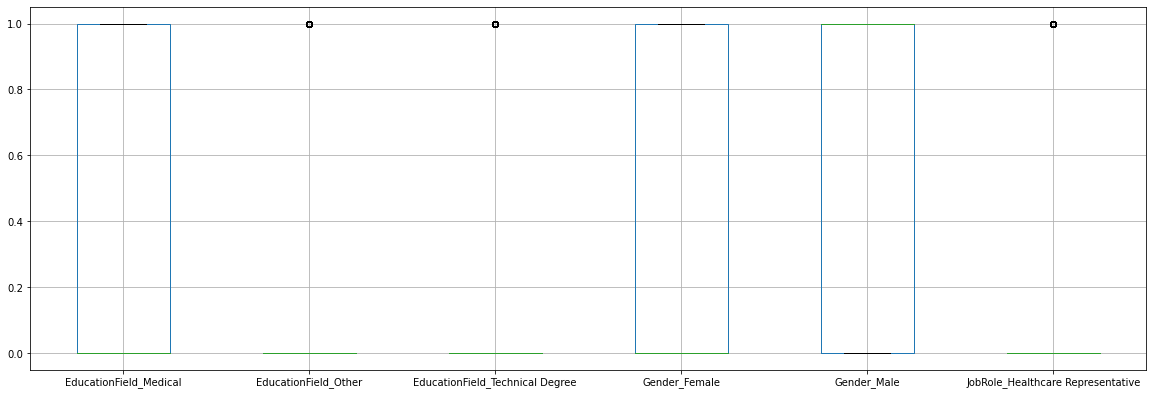

In [49]:
x1.iloc[:,34:40].boxplot(figsize=[20,8],)
plt.subplots_adjust(bottom=.25)
plt.show()

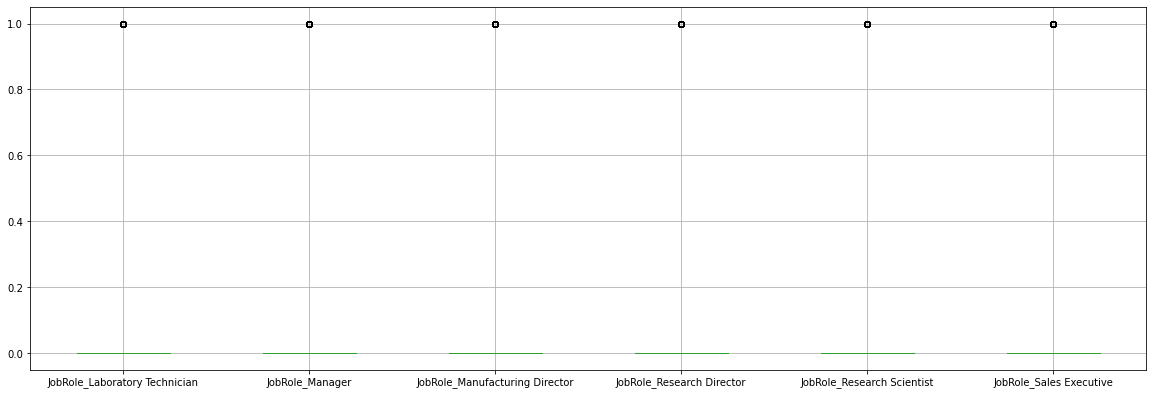

In [50]:
x1.iloc[:,41:47].boxplot(figsize=[20,8],)
plt.subplots_adjust(bottom=.25)
plt.show()

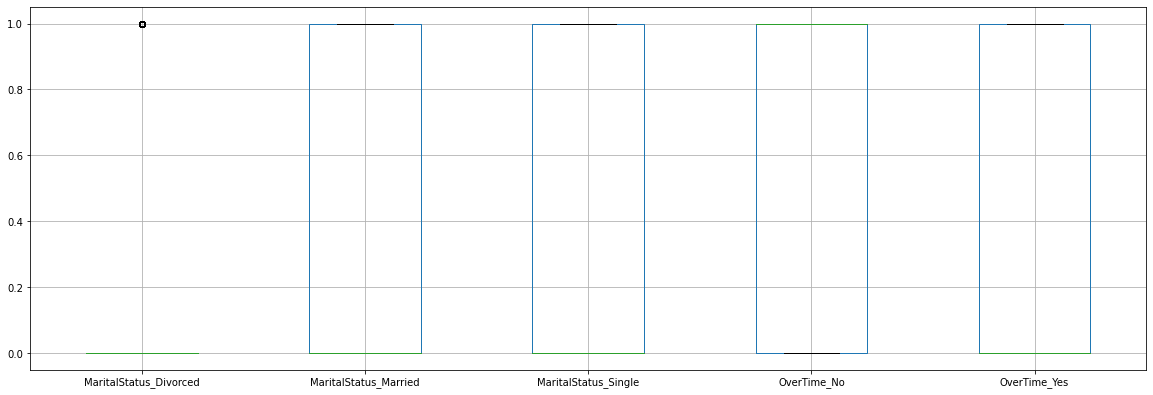

In [51]:
x1.iloc[:,48:55].boxplot(figsize=[20,8],)
plt.subplots_adjust(bottom=.25)
plt.show()

In [52]:
# MontlyIncome is at higherside

In [53]:

# 1st quantile

q1=x1.quantile(0.25)

#3rd quantile

q3=x1.quantile(0.75)

# IQR

iqr=q3-q1

In [54]:
index=np.where(x1['MonthlyIncome']>(q3.MonthlyIncome+(1.5*iqr.MonthlyIncome)))
x1=x1.drop(x1.index[index])
x1.reset_index()

index  Age  Attrition  DailyRate  DistanceFromHome  Education  \
0         0   41          1       1102                 1          2   
1         1   49          0        279                 8          1   
2         2   37          1       1373                 2          2   
3         3   33          0       1392                 3          4   
4         4   27          0        591                 2          1   
5         5   32          0       1005                 2          2   
6         6   59          0       1324                 3          3   
7         7   30          0       1358                24          1   
8         8   38          0        216                23          3   
9         9   36          0       1299                27          3   
10       10   35          0        809                16          3   
11       11   29          0        153                15          2   
12       12   31          0        670                26          1   
13       13   34          0       1346                19          2   
14       14   28          1        103                24          3   
15       15   29          0       1389                21          4   
16       16   32          0        334                 5          2   
17       17   22          0       1123                16          2   
18       18   53          0       1219                 2          4   
19       19   38          0        371                 2          3   
20       20   24          0        673                11          2   
21       21   36          1       1218                 9          4   
22       22   34          0        419                 7          4   
23       23   21          0        391                15          2   
24       24   34          1        699                 6          1   
25       26   32          1       1125                16          1   
26       27   42          0        691                 8          4   
27       28   44          0        477                 7          4   
28       30   33          0        924                 2          3   
29       31   44          0       1459                10          4   
30       32   30          0        125                 9          2   
31       33   39          1        895                 5          3   
32       34   24          1        813                 1          3   
33       35   43          0       1273                 2          2   
34       36   50          1        869                 3          2   
35       37   35          0        890                 2          3   
36       38   36          0        852                 5          4   
37       39   33          0       1141                 1          3   
38       40   35          0        464                 4          2   
39       41   27          0       1240                 2          4   
40       42   26          1       1357                25          3   
41       43   27          0        994                 8          3   
42       44   30          0        721                 1          2   
43       46   34          0       1065                23          4   
44       47   37          0        408                19          2   
45       48   46          0       1211                 5          4   
46       49   35          0       1229                 8          1   
47       50   48          1        626                 1          2   
48       51   28          1       1434                 5          4   
49       52   44          0       1488                 1          5   
50       53   35          0       1097                11          2   
51       54   26          0       1443                23          3   
52       55   33          0        515                 1          2   
53       56   35          0        853                18          5   
54       57   35          0       1142                23          4   
55       58   31          0   

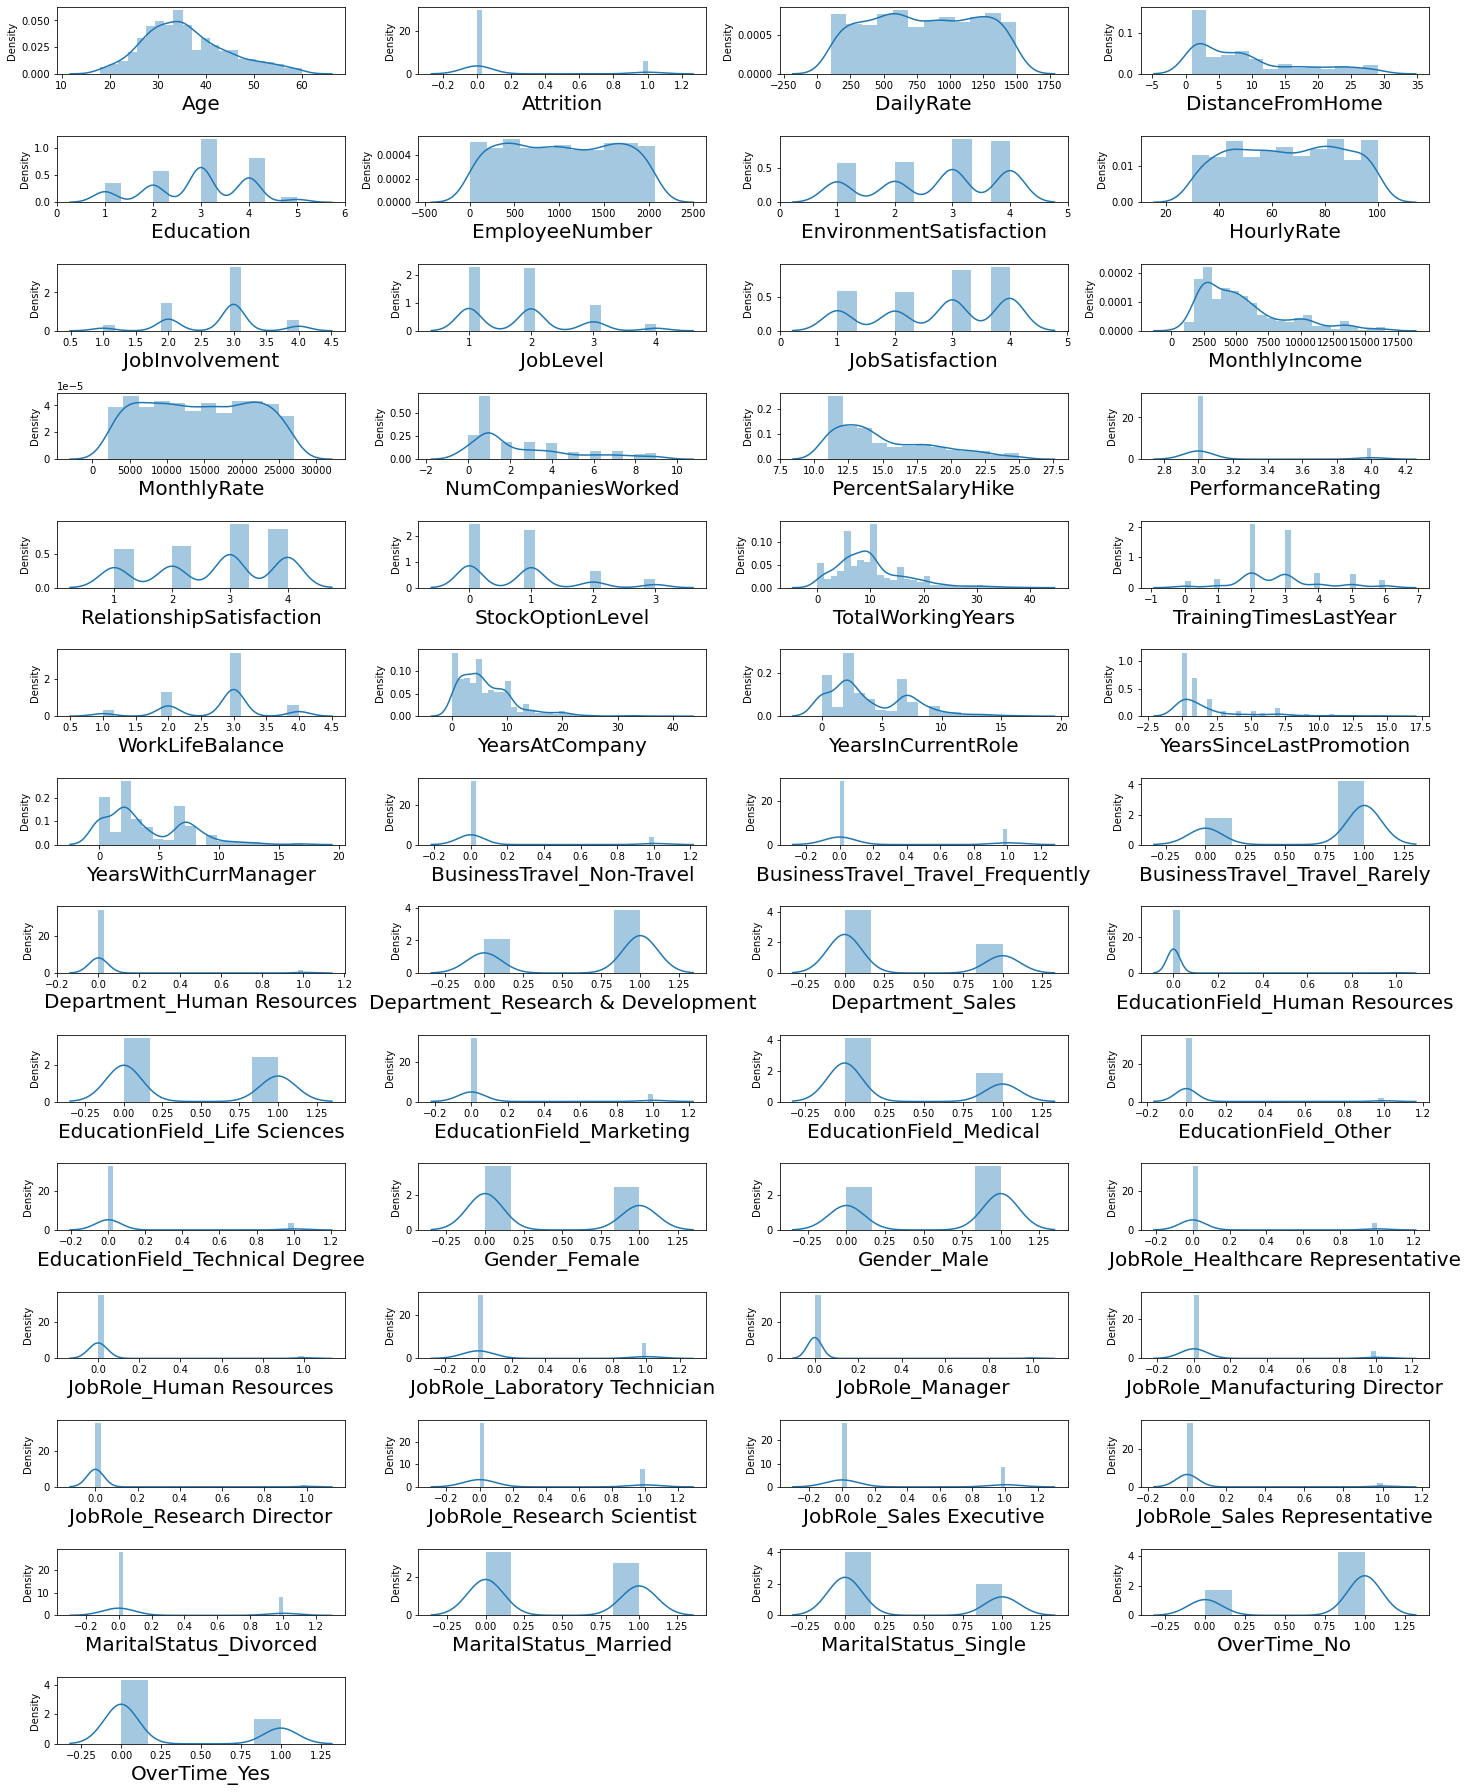

In [72]:
# Checking density after outlier treatment

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in x1:
    if plotnumber<=54:
        ax=plt.subplot(14,4,plotnumber)
        sns.distplot(x1[column])
        plt.xlabel(column,fontsize=20)
       
    
    plotnumber+=1
plt.tight_layout() 

In [ ]:
# No distribution of continueous variable looking better

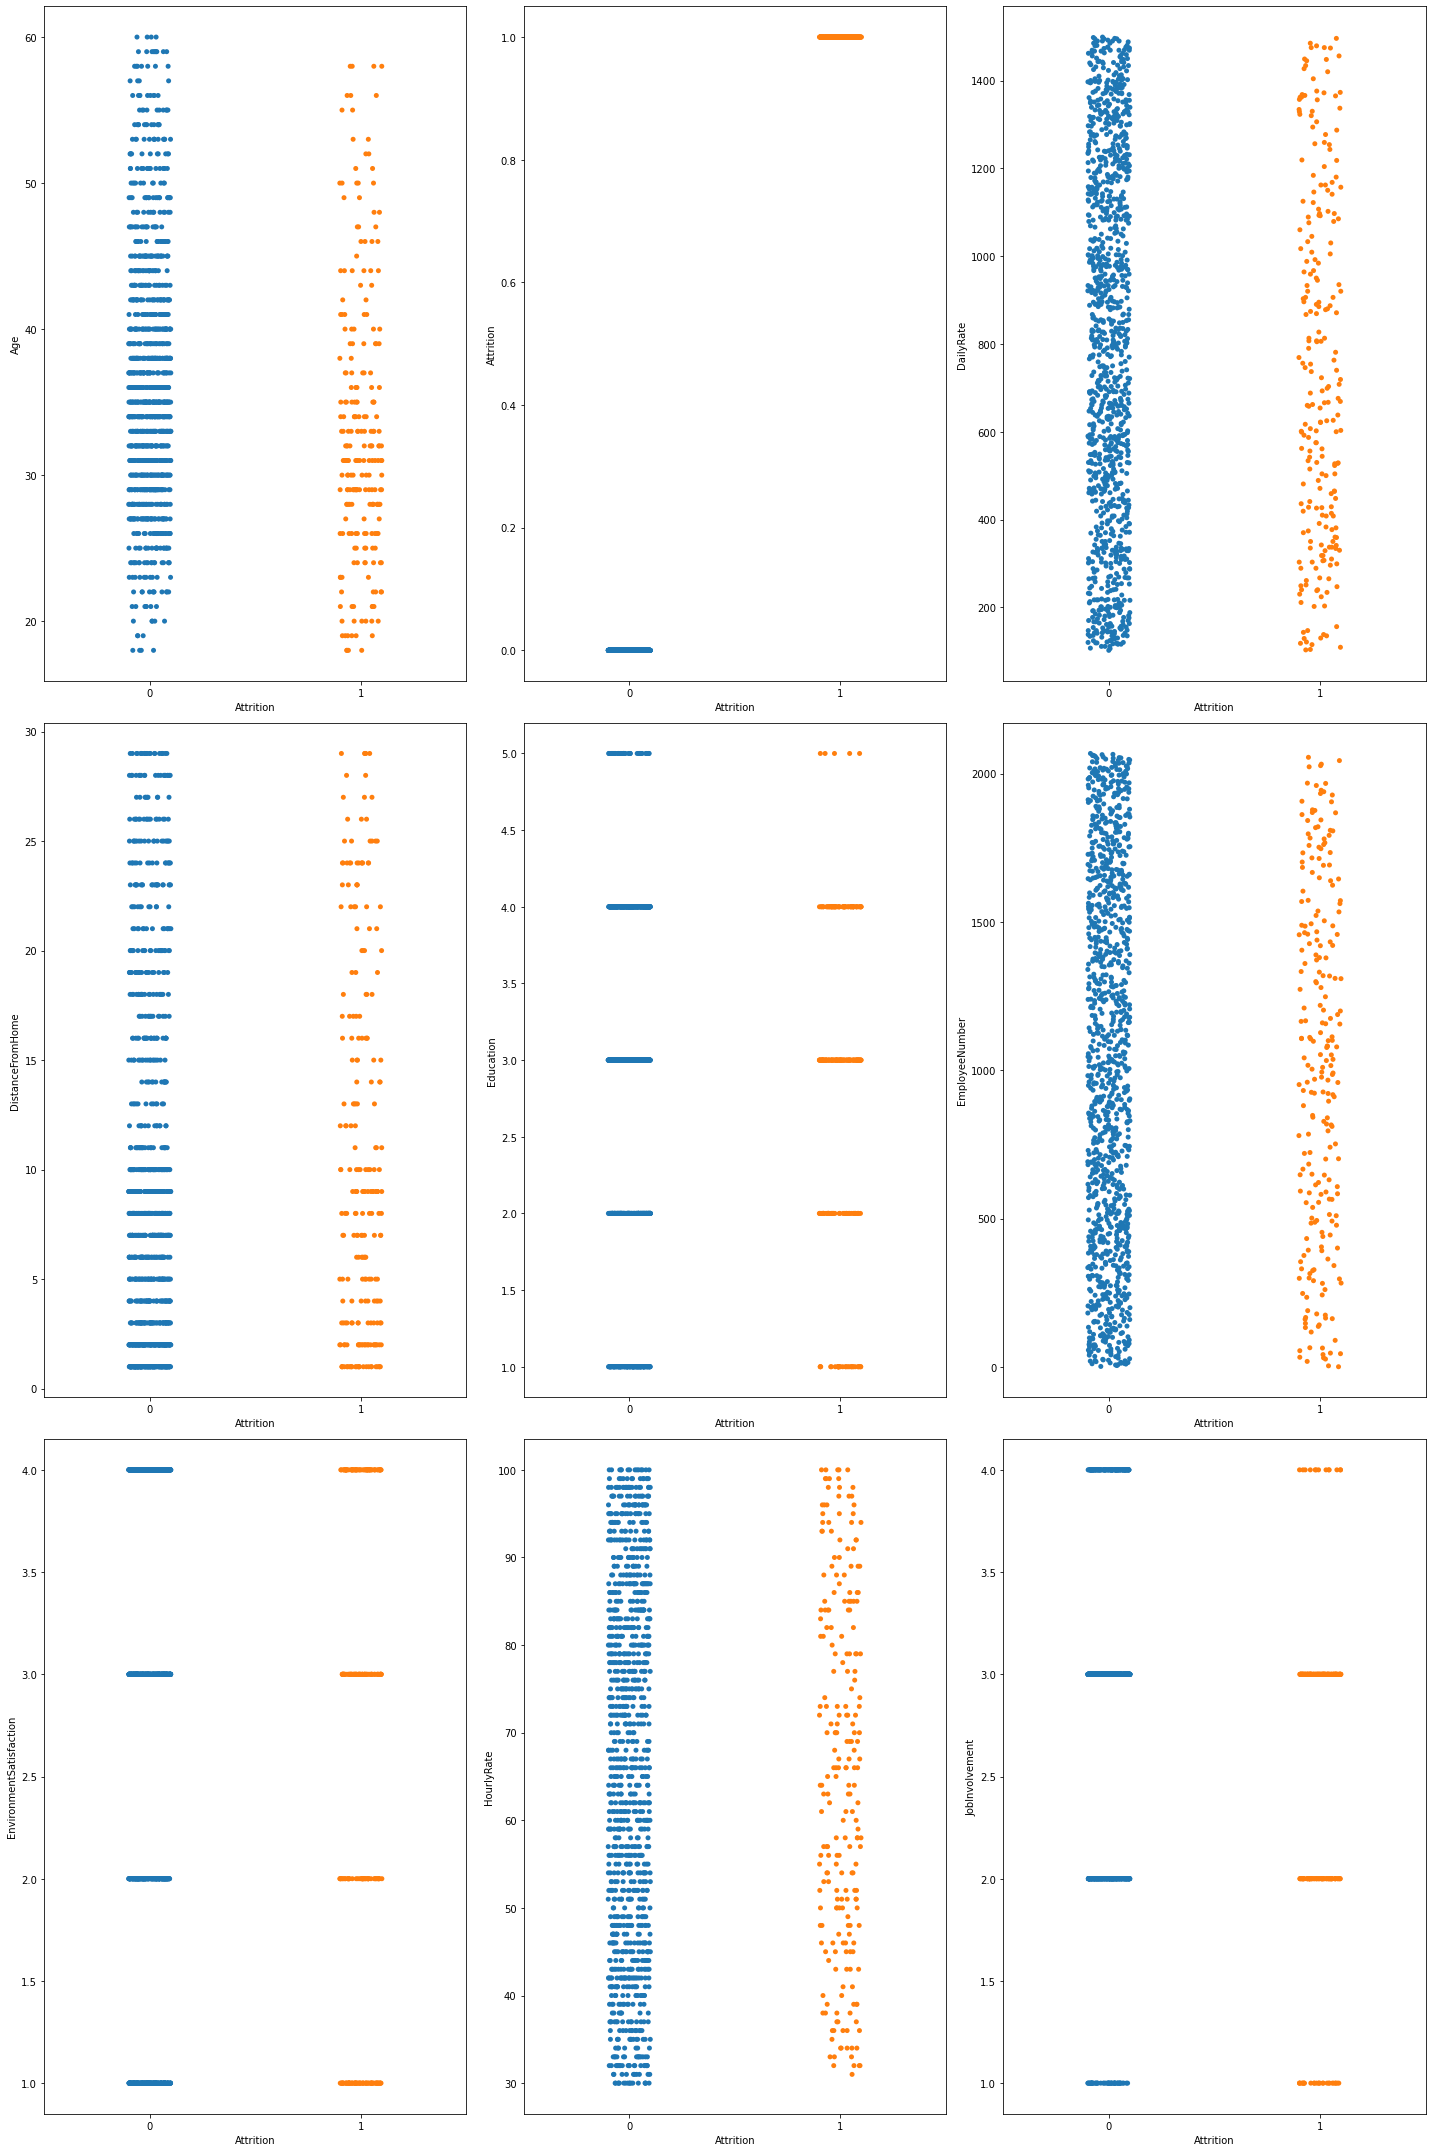

In [73]:
# Analysing relation between each feature and label
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in x1:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
plt.tight_layout()

In [ ]:
# Each feature is showing suignificant relation with the label.So,not dropping any feature

In [55]:
# Cheching whether Output is imbalance 

In [56]:
x1['Attrition'].value_counts()

0    1124
1     232
Name: Attrition, dtype: int64

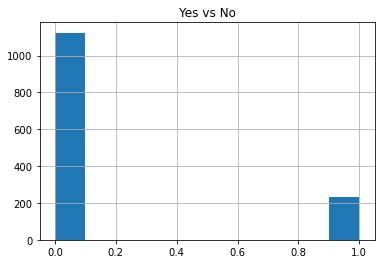

In [57]:
x1['Attrition'].hist(grid=True)# Univariate Analysis
plt.title("Yes vs No")
plt.show()

In [58]:
from imblearn.over_sampling import SMOTE

In [59]:
y=x1['Attrition']
x3=x1.drop(['Attrition'],axis=1)

In [60]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over,y_over =SM.fit_resample(x3,y)

In [61]:
y_over.value_counts()


1    1124
0    1124
Name: Attrition, dtype: int64

In [62]:
#Model Development

In [63]:
# Finding best random state

In [64]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test =train_test_split(x_over,y_over,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on Random_state",maxRS)

Best accuracy is 0.7274074074074074 on Random_state 43


In [65]:
#Best accuracy is 0.7525925925925926 on Random_state 29

In [66]:
#Creating Train test split

In [67]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.677037037037037
[[217 109]
 [109 240]]
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       326
           1       0.69      0.69      0.69       349

    accuracy                           0.68       675
   macro avg       0.68      0.68      0.68       675
weighted avg       0.68      0.68      0.68       675



In [68]:
#XGB

In [69]:
import xgboost as xgb
xgb=xgb.XGBClassifier()
xgb.fit(x_train,y_train)
predxgb=xgb.predict(x_test)
print(accuracy_score(y_test,predxgb))
print(confusion_matrix(y_test,predxgb))
print(classification_report(y_test,predxgb))

[08:18:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9333333333333333
[[314  12]
 [ 33 316]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       326
           1       0.96      0.91      0.93       349

    accuracy                           0.93       675
   macro avg       0.93      0.93      0.93       675
weighted avg       0.94      0.93      0.93       675



In [70]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9288888888888889
[[315  11]
 [ 37 312]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       326
           1       0.97      0.89      0.93       349

    accuracy                           0.93       675
   macro avg       0.93      0.93      0.93       675
weighted avg       0.93      0.93      0.93       675



In [71]:
from sklearn.ensemble import AdaBoostClassifier
Ada=AdaBoostClassifier()
Ada.fit(x_train,y_train)
predAda=Ada.predict(x_test)
print(accuracy_score(y_test,predAda))
print(confusion_matrix(y_test,predAda))
print(classification_report(y_test,predAda))

0.9066666666666666
[[300  26]
 [ 37 312]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       326
           1       0.92      0.89      0.91       349

    accuracy                           0.91       675
   macro avg       0.91      0.91      0.91       675
weighted avg       0.91      0.91      0.91       675



In [75]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(LR,x_over,y_over,cv=5)
print("Cross Validation Score fo Logistic Regression :",scr.mean())

Cross Validation Score fo Logistic Regression : 0.5902796337540213


In [76]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(xgb,x_over,y_over,cv=5)
print("Cross Validation Score fo XGB :",scr.mean())

[08:39:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:39:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:39:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:39:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [77]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rf,x_over,y_over,cv=5)
print("Cross Validation Score fo RandomForest :",scr.mean())

Cross Validation Score fo RandomForest : 0.8353664934422171


In [78]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(Ada,x_over,y_over,cv=5)
print("Cross Validation Score fo Adaboost :",scr.mean())

Cross Validation Score fo Adaboost : 0.6752259341747092


In [ ]:
          Model Accuracy      Cross Validation Score      Diff
    LR     68                         57                  11
    DT     93                         70                  13
    RF     93                         83                  10
    SVC    91                         67                  24

    Since diff is less fro RF,It is the best model 

In [ ]:
#Lets do hyper parameter tuning for best model

In [79]:
params ={'n_estimators':range(10,100,10),
       'criterion':['entropy','Gini'],
       'max_depth':range(2, 30, 3),
       'min_samples_split':range(1, 20, 2),
       'min_samples_leaf':(2, 20, 2)}

grd = GridSearchCV(rf,param_grid=params)
grd.fit(x_train,y_train)
print('best_params =>', grd.best_params_)

rf=grd.best_estimator_ # reinstantiating with best params
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

fr_conf_mat= confusion_matrix(y_test,y_pred)
print('conf_mat =>','\n',fr_conf_mat)

print('Accuracy rf Normal =====>',accuracy_score(y_test,y_pred))
print(classification_report(y_test,predrf))

best_params => {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 9, 'n_estimators': 70}
conf_mat => 
 [[316  10]
 [ 34 315]]
Accuracy rf Normal =====> 0.9348148148148148
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       326
           1       0.97      0.89      0.93       349

    accuracy                           0.93       675
   macro avg       0.93      0.93      0.93       675
weighted avg       0.93      0.93      0.93       675



In [ ]:
#Random forest is best Model

In [ ]:
import pickle

# writing diffrent model files to file

with open('modelForPrediction.sav','rf') as f:
    pickle.dump(rf,f)
    
with open ('SandardScalar.sav','rf') as f:
    pickle.dump(scalar,f)